In this notebook, I will create several UMAPS with the data from Lenselink and check wether I can find physiochemical properties that are or are not captured by canonical SMILES.

ATTENTION: I saw that there are [special metrics](https://umap-learn.readthedocs.io/en/latest/parameters.html#metric) for binary data. I haven't tried the out yet.

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import umap

In [38]:
df = pd.read_csv('../datasets/Lenselink_et_al/Lenselink_1_Molecular_Notation_Transformation_150samples.csv')

#### Binarize - molecular surface area
mean 430
std 135
min 151
max 1000

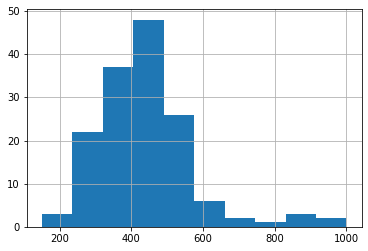

In [39]:
df.CMP_MOLECULAR_SURFACEAREA.hist()

threshold: mean -> 430

In [40]:
df['binary_mol_surface_area'] = (df['CMP_MOLECULAR_SURFACEAREA'] < 430).astype(int)

#### Binarize - LogP

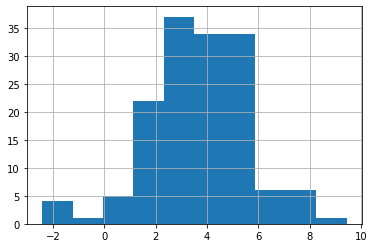

In [41]:
df.CMP_LOGP.hist()

In [42]:
df['binary_logp'] = (df['CMP_LOGP'] < 3.68).astype(int)

#### Binarize - Solubility

mean -6.17

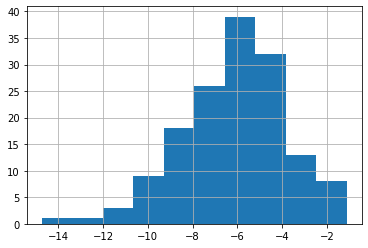

In [43]:
df.CMP_SOLUBILITY.hist()

In [44]:
df['binary_solubility'] = (df['CMP_SOLUBILITY'] < -6.17).astype(int)

#### Binarize - Molecular weight

mean 435.69

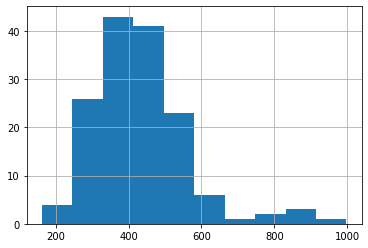

In [45]:
df.CMP_MOLECULAR_WEIGHT.hist()

In [46]:
df['binary_molecular_weight'] = (df['CMP_MOLECULAR_WEIGHT'] < 435.69).astype(int)

In [47]:
#df.describe()

### Data preparation

The question now is with which data I want to train the UMAP. I currently have the binary as well as the non-binary versions in my dataframe.\
2 Options:\
a) train with all binarized properties\
b) train with just 1 binarized property at a time\

I tried option a, and I don't see a pattern in any of the plots.
I tried option b) by only binarizing the molecular surface area, but I didn't see a pattern there either.

In [36]:
# for option a)
#df.drop(columns=['CMP_MOLECULAR_SURFACEAREA',
#                'CMP_LOGP',
#                'CMP_SOLUBILITY',
#                'CMP_MOLECULAR_WEIGHT'])

In [52]:
# for option b)
# I will binarize just the molecular weight.

df.drop(columns=['binary_mol_surface_area',
                'binary_logp',
                'binary_solubility',
                'CMP_MOLECULAR_WEIGHT'])

,Unnamed: 0,Unnamed: 0.1,CMP_CLASS_SMALL_MOLECULE,CMP_CLASS_BIOLOGICAL,CMP_CLASS_PEPTIDE,CMP_CLASS_ORGANIC,CMP_FORMALCHARGE,CMP_NUM_RINGS,CMP_NUM_AROMATICRINGS,CMP_NUM_CHAINS,CMP_MOLECULAR_SURFACEAREA,CMP_LOGP,CMP_SOLUBILITY,CMP_ATOMS_POSITIVE_FRAC,CMP_ATOMS_NEGATIVE_FRAC,canonical_smiles,fingerprint,binary_molecular_weight
0,193782,193782,1,0,0,1,0,4,2,7,395.91,-1.373,-2.130,0.0,0.0,COC(=O)[C@@H]1C[C@H](SC[C@H]2O[C@@H](n3cnc4c(N...,1110111010110101101011111011010010001100100110...,1
1,195928,195928,1,0,0,1,0,6,5,7,498.38,6.996,-8.837,0.0,0.0,C[C@H]1CN(c2ccc3c(Nc4ccc(Cl)c(-c5ncc(-c6ccccc6...,1100010101011110100010111101101011111101000110...,0
2,42845,42845,1,0,0,1,0,4,4,5,312.08,2.695,-3.695,0.0,0.0,N=C(N)c1ccc2[nH]c(Cc3nc4cc(F)c(F)cc4[nH]3)nc2c1,1000011000100000000001000000000010111000000001...,1
3,54351,54351,1,0,0,1,0,3,2,5,373.79,4.279,-6.647,0.0,0.0,CN(/N=C/c1cc(Br)ccc1OCc1ccc(Cl)cc1)C1=NCCN1,1000000001000001000010011000000000100000000110...,1
4,141989,141989,1,0,0,1,0,4,3,4,308.19,3.657,-5.175,0.0,0.0,Cc1ccc(S(=O)(=O)n2c3c(c4ccccc42)CCNC3)cc1,1000010111111001000111000111001111110101011010...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,45971,45971,0,1,0,0,0,4,3,10,538.25,2.927,-6.476,0.0,0.0,CC(C)C[C@H](NC(=O)c1cc2ccccc2o1)C(=O)N[C@H]1C[...,1111011111110100110001001111111111001111101111...,0
146,154164,154164,1,0,0,1,0,4,2,5,408.49,1.262,-4.350,0.0,0.0,CS(=O)(=O)Nc1ccc2c(c1)OC1(CCN(CCc3ccccn3)CC1)C...,1011010111111000100010001011000110100100000010...,1
147,17608,17608,1,0,0,1,0,5,4,8,406.48,3.595,-5.251,0.0,0.0,C[C@]1(O)C[C@@H](c2nc(-c3ccc(Oc4ccccc4)c(F)c3F...,1100111111010110000101111111110011101001111110...,1
148,57318,57318,1,0,0,1,0,5,4,3,327.06,3.678,-6.184,0.0,0.0,Oc1ccc(C2CC(n3ccnc3)c3ccc4ccccc4c3O2)cc1,1101111001011100000000110100000000100110100110...,1


In [53]:
umap_input = np.zeros([len(df), 2048], dtype=np.int8)

for i in range(len(df)):
    umap_input[i] = np.asarray(list(df.iloc[i,17]),
                               dtype=np.int8)

In [ ]:
#umap_input

In [54]:
# function from Chris

def umap_reduce(embeddings, **kwargs):
    umap_params = dict()

    umap_params['n_components'] = kwargs.get('n_components', 2)
    umap_params['min_dist'] = kwargs.get('min_dist', .6)
    umap_params['random_state'] = kwargs.get('random_state', 420)
    umap_params['n_neighbors'] = kwargs.get('n_neighbors', 15)
    umap_params['verbose'] = kwargs.get('verbose', 1)
    umap_params['metric'] = kwargs.get('metric', 'cosine')

    transformed_embeddings = umap.UMAP(**umap_params).fit_transform(embeddings)

    return transformed_embeddings

In [55]:
transformed_embeddings = umap_reduce(umap_input)

UMAP(a=None, angular_rp_forest=True, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='cosine',
     metric_kwds=None, min_dist=0.6, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=420, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=1)
Construct fuzzy simplicial set
Sun Jul  5 19:38:34 2020 Finding Nearest Neighbors
Sun Jul  5 19:38:34 2020 Finished Nearest Neighbor Search
Sun Jul  5 19:38:34 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /

In [ ]:
#transformed_embeddings

### UMAP base

In [56]:
from pandas import DataFrame

def render_2D_scatter_plotly(embeddings_dataframe: DataFrame, title=''):
    fig = px.scatter(embeddings_dataframe,
                     template='ggplot2',
                     x='x',
                     y='y',
                     color='label',
                     hover_name=embeddings_dataframe.index,
                     title=title,
                     width=600,
                     height=600,
                     color_continuous_scale='Bluered_r'
                     #color_continuous_scale='Viridis'
                     
                     # TODO:
                     # remove axis ticks + numbers
                     # remove legend
                     # remove axis labels
                     # make the points bigger
                     
                     #showticklabels=False,
                     #showspikes=False
                     #marker_size=3                     
                    )

    fig.layout.coloraxis.showscale=False
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    
    return fig

In [57]:
# Numpy nd array -> Pandas Dataframe
temp_plot_input = pd.DataFrame(data = transformed_embeddings)
temp_plot_input.columns = ['x', 'y']

In [31]:
#temp_plot_input

### UMAP colored by physiochemical property

#### Molecular weight

In [58]:
molecular_weight = temp_plot_input
molecular_weight['label'] = df['binary_molecular_weight']
molecular_weight_plot = render_2D_scatter_plotly(molecular_weight, title='Molecular weight')
molecular_weight_plot

#### Solubility

In [33]:
solubility = temp_plot_input
solubility['label'] = df['binary_solubility']
solubility_plot = render_2D_scatter_plotly(solubility, title='Solubility')
solubility_plot

#### Surface area

In [34]:
surfacearea = temp_plot_input
surfacearea['label'] = df['binary_mol_surface_area']
surfacearea_plot = render_2D_scatter_plotly(surfacearea, title='Molecular surface area')
surfacearea_plot

#### Number of aromatic rings

In [ ]:
aromatic_rings = temp_plot_input
aromatic_rings['label'] = df['CMP_NUM_AROMATICRINGS']
aromatic_rings_plot = render_2D_scatter_plotly(aromatic_rings, title='Number of aromatic rings')
aromatic_rings_plot

#### LogP

In [35]:
LogP = temp_plot_input
LogP['label'] = df['binary_logp']
LogP_plot = render_2D_scatter_plotly(LogP, title='LogP')
LogP_plot

#### Share of positively charged atoms

In [ ]:
pos_charge = temp_plot_input
pos_charge['label'] = df['CMP_ATOMS_POSITIVE_FRAC']
pos_charge_plot = render_2D_scatter_plotly(pos_charge, title='Share of positively charged atoms')
pos_charge_plot

#### Share of negatively charged atoms

In [ ]:
neg_charge = temp_plot_input
neg_charge['label'] = df['CMP_ATOMS_NEGATIVE_FRAC']
neg_charge_plot = render_2D_scatter_plotly(neg_charge, title='Share of negatively charged atoms')
neg_charge_plot

In [ ]:
df.head()

In [ ]:
df.describe()